1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
# GD - градиентный спуск
def run_gd(X, y, max_iters=1000, eta=1e-3, diff=0.):
    n = X.shape[0]
    prev_err, err = np.inf, 0.
    w = np.random.randn(X.shape[1])
    
    for i in range(1, max_iters + 1):
        if abs(prev_err - err) < diff:
            break
        
        y_pred = np.dot(X, w)
        prev_err = err
        err = calc_mse(y, y_pred)
        w -= (eta * (1/n * 2 * np.sum(X.T * (y_pred - y), axis=1)))
    
    return (w, err, i)

In [5]:
# SGD - стохастический градиентный спуск
def run_SGD(X, y, iterations, eta=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        
    return w, err

In [6]:
# mini-batch градиентный спуск
def run_mbGD(X, y, iterations, batch=100, eta=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch # число батчей
    if n % batch != 0:
        n_batch += 1
    
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_batch = X[start_ : end_, :]
            y_batch = y[start_ : end_]
            y_pred = np.dot(X_batch, w)
            w -= eta * (2/len(y_batch) * np.dot(X_batch.T, (y_pred - y_batch)))
        
    return w, err

In [7]:
X_, y_, coef = datasets.make_regression(n_samples=2000, 
                                      n_features=4, 
                                      n_informative=4, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=10)
coef

array([18.7791367 , 80.36922868, 30.00791957, 11.22644867])

In [8]:
iters = np.arange(100, 2001, 100)
gd_errs = [run_gd(X_, y_, max_iters=i)[1] for i in iters]
sgd_errs = [run_SGD(X_, y_, i)[1] for i in iters]
mbgd_errs = [run_mbGD(X_, y_, i)[1] for i in iters]

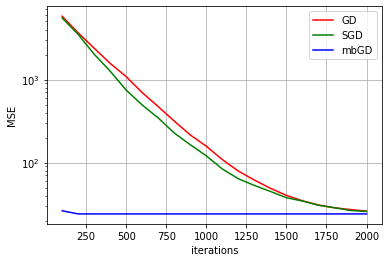

In [9]:
plt.plot(iters, gd_errs, 'r', label='GD')
plt.plot(iters, sgd_errs, 'g', label='SGD')
plt.plot(iters, mbgd_errs, 'b', label='mbGD')
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend();

**Вывод:** наиболее быстро сходится mini-batch, а стохастический начинает сходиться быстрее обычного градиентного спуска. При этом оба не достигают минимальной ошибки за 2000 итераций.

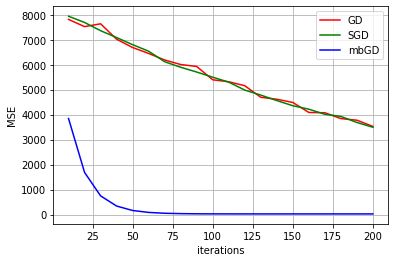

In [10]:
iters = np.arange(10, 201, 10)
gd_errs = [run_gd(X_, y_, max_iters=i)[1] for i in iters]
sgd_errs = [run_SGD(X_, y_, i)[1] for i in iters]
mbgd_errs = [run_mbGD(X_, y_, i)[1] for i in iters]

plt.plot(iters, gd_errs, 'r', label='GD')
plt.plot(iters, sgd_errs, 'g', label='SGD')
plt.plot(iters, mbgd_errs, 'b', label='mbGD')
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend();

Уменьшив диапазон по итерациям, можно видеть, насколько быстро mini-batch достигает минимальной ошибки.

Проанализируем результаты алгоритмов при стандартизации данных

In [11]:
def standardization(x):
    s = (x - x.mean(axis=0)) / x.std(axis=0)
    return s

In [12]:
X_st = X_.copy().astype(np.float64)
X_st = standardization(X_st)

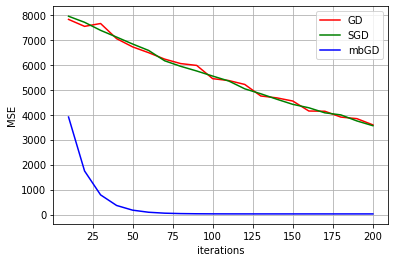

In [13]:
iters = np.arange(10, 201, 10)
gd_errs = [run_gd(X_st, y_, max_iters=i)[1] for i in iters]
sgd_errs = [run_SGD(X_st, y_, i)[1] for i in iters]
mbgd_errs = [run_mbGD(X_st, y_, i)[1] for i in iters]

plt.plot(iters, gd_errs, 'r', label='GD')
plt.plot(iters, sgd_errs, 'g', label='SGD')
plt.plot(iters, mbgd_errs, 'b', label='mbGD')
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend();

Стандартизация данных не оказала существенного влияния на результат mini-batch

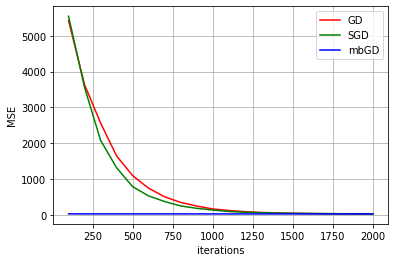

In [14]:
iters = np.arange(100, 2001, 100)
gd_errs = [run_gd(X_st, y_, max_iters=i)[1] for i in iters]
sgd_errs = [run_SGD(X_st, y_, i)[1] for i in iters]
mbgd_errs = [run_mbGD(X_st, y_, i)[1] for i in iters]

plt.plot(iters, gd_errs, 'r', label='GD')
plt.plot(iters, sgd_errs, 'g', label='SGD')
plt.plot(iters, mbgd_errs, 'b', label='mbGD')
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend();

Для стохастического и обычного градиентных спусков стандартизация позволила увеличить скорость сходимости.

Проверки весов

In [34]:
run_gd(X_st, y_, max_iters=2000)

(array([17.79771895, 80.23599076, 29.43249321, 11.05553483]),
 26.8096911384121,
 2000)

In [35]:
run_SGD(X_st, y_, 2000)

(array([17.86318937, 80.22930255, 29.60845972, 11.17476872]),
 26.63467512463051)

In [36]:
run_mbGD(X_st, y_, 2000)

(array([18.10001941, 81.66773843, 29.8996774 , 11.08941424]),
 24.412440544045857)

In [37]:
coef

array([18.7791367 , 80.36922868, 30.00791957, 11.22644867])